# **Seaborn**

seaborn adalah library dari python yang berfungsi untuk melakukan visualisasi pada dataset, dimana seaborn lebih mudah digunakan dari pada Matplotlib.

Seaborn dibuat di atas matplotlib oleh karena itu ada baiknya mempelajari matplotlib terlebih dahulu daripada seaborn.

- Seaborn juga tingkat antarmuka rendah(low) | Matplotlib tingkat antarmuka tinggi (high).
- Seaborn fokus pada visual statistik | Maplotlib fokus pada plotting yang umum digunakan.
- Seaborn lebih terintegrasi dengan Pandas | Matplotlib kurang terintegrasi dengan Pandas.
- Seaborn tidak membutuhkan banyak kode | Maplotlib membutuhkan banyak kode untuk melakukan visualisasi.
- Seaborn tidak bisa dengan bebas mengkostum visual | Matplotlib lebih bebas dalam mengkostum.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sampleCarData.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


Sebelum memulai langkah selanjutnya, menurut saya langkah awal sebelum memproses dataset adalah memahami dan mengalisa kolom-kolom pada dataset, jadi berikut adalah arti dari tiap kolomnya :
Make: Merek mobil.
- `Model`: Nama model mobil.
- `Type`: Jenis mobil berdasarkan bentuk atau kategori.
- `Origin`: Asal wilayah produksi mobil.
- `DriveTrain`: Sistem penggerak roda.
- `MSRP`: Harga resmi yang disarankan pabrikan.
- `Invoice`: Harga faktur yang dibayarkan dealer ke pabrikan.
- `EngineSize`: Kapasitas mesin dalam liter.
- `Cylinders`: Jumlah silinder pada mesin.
- `Horsepower`: Tenaga mesin yang dihasilkan.
- `MPG_City`: Efisiensi bahan bakar saat digunakan di dalam kota.
- `MPG_Highway`: Efisiensi bahan bakar saat digunakan di jalan tol.
- `Weight`: Berat mobil.
- `Wheelbase`: Jarak antara sumbu roda depan dan roda belakang.
- `Length`: Panjang keseluruhan mobil.

# Data Cleaning

In [3]:
df.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.head(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    float64
 10  MPG_City     426 non-null    float64
 11  MPG_Highway  426 non-null    float64
 12  Weight       426 non-null    float64
 13  Wheelbase    426 non-null    float64
 14  Length       426 non-null    float64
dtypes: float64(8), object(7)
memory usage: 53.2+ KB


In [7]:
df['MSRP'] = df['MSRP'].replace({'\$':'', ',':''},regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10344\999713381.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['MSRP'] = df['MSRP'].replace({'\$':'', ',':''},regex=True)


In [8]:
df['MSRP']

0      36945 
1      23820 
2      26990 
3      33195 
4      43755 
        ...  
427    40565 
428    42565 
429    45210 
430    26135 
431    35145 
Name: MSRP, Length: 426, dtype: object

In [9]:
df['MSRP'] = df['MSRP'].astype(int)

In [10]:
df['Cylinders'] = df['Cylinders'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    int64  
 9   Horsepower   426 non-null    float64
 10  MPG_City     426 non-null    float64
 11  MPG_Highway  426 non-null    float64
 12  Weight       426 non-null    float64
 13  Wheelbase    426 non-null    float64
 14  Length       426 non-null    float64
dtypes: float64(7), int64(2), object(6)
memory usage: 53.2+ KB


# Visualization

## 1. Count Plot

**Count Plot** digunakan untuk melihat atau menganalisis dataset yang berbentuk kategori, dimana kita bisa melihat frekuensi (jumlah) dari setiap kategori.

`seaborn.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)`

In [12]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,"$33,337",3.5,6,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,"$21,761",2.0,4,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,"$24,647",2.4,4,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195,"$30,299",3.2,6,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,"$39,014",3.5,6,225.0,18.0,24.0,3880.0,115.0,197.0


In [13]:
df['Origin'].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

Pada plot berikut kita menampilkan jumlah data dari kolom Type dan dikategorikan lagi berdasarkan kolom Origin menggunakan parameter `hue=`.
Kita juga menggunakan tema visual menggunakan parrrameter `palette=` dengan tema Set2

Pada plot berikut, kita bisa melihat data yang paling banyak adalah Type Sedan dengan Origin dari Asia yang mencapai 80 lebih.

<Axes: xlabel='Type', ylabel='count'>

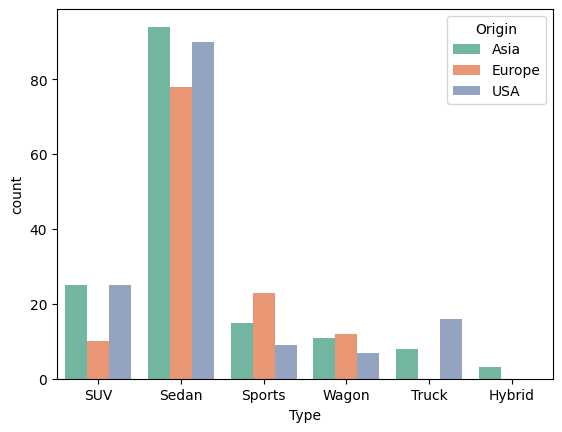

In [14]:
sns.countplot(x='Type', data=df, palette='Set2', hue='Origin')

Dengan menggunaka parameter `order=`, kita bisa memfilter data apa saja yang akan kita tampilkan seperti pada variabel `origin_order` berikut, seharusnya memiliki 3 data tetapi kita memasukkan 2 data saja.<br>
Berlaku juga pada data di sumbu Y menggunakan parm `hue_order=`, kita bisa memfilter, menggunakan data apa saja yg kita gunakan, contoh pada var `type_order` berfungsi untuk data apa yang digunakan.

In [15]:
# order dan hue_order untuk costum kategori apa saja yang akan di tampilkan
type_order = ['SUV', 'Sedan', 'Truck', 'Sports']
origin_order = ['Europe', 'Asia']


Pada plot barikut kita melihat data yang kita miliki hanya 4 kategori(SUV, Sedan, Truck, dan Sportss) berdasarkan 2 jenis saja (Europe dan Asia).<br>
Data paling sedikit/rendah adalah Type Truck dari Asia. Bahkan, tidak ada Truck dari wilayah Europe.

<Axes: xlabel='Type', ylabel='count'>

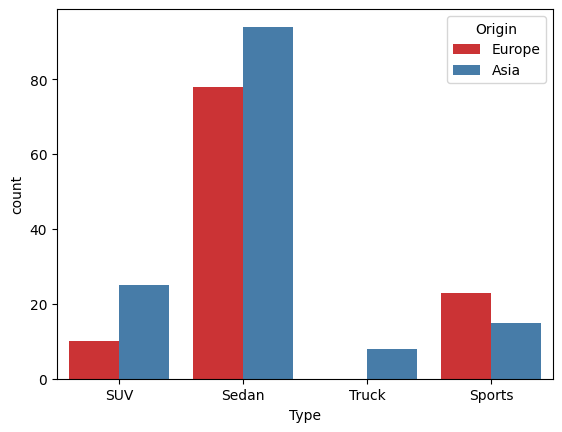

In [16]:
sns.countplot(x='Type', data=df, palette='Set1', order=type_order, hue='Origin', hue_order=origin_order)

In [17]:
# sns.countplot(x='Type', data=df, hue='Origin', palette='Set2_r', linewidth=1, facecolor=(1,1,1,1),edgecolor=sns.color_palette('dark', 3))

## 2. Bar Plots

In [18]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,"$33,337",3.5,6,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,"$21,761",2.0,4,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,"$24,647",2.4,4,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195,"$30,299",3.2,6,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,"$39,014",3.5,6,225.0,18.0,24.0,3880.0,115.0,197.0


Berbeda dengan counts plot yang hanya bisa melihat Jumlah/banyaknya data dari satu variabel(kolom) saja.<br> Di bar plots kita membuat plot dengan memasukkan 2 variabel yang dimana satu adalah bentuk numerik dan satu lagi berbentuk kategori, cth `MSRP` berbentuk numerik dan `Type` berbentuk kategori 

Parameter yang umum digunakan :
- `capsize=` -> 0.1 - 1.0 | membuat batas pada CI
- `ci=` -> None | Menghilangkan CI
- `saturation=` -> 0.1 - 1.0 | Mengatur kecerahan pada bar
- `estimator=` -> `sum`, `np.median`, | mengubah ukuran pada sumbu y

Bisa kita lihat bahwa bar plot dibawah ini menunjukkan harga mobil berdasarkan tipenya.<br>
Tetapi ada garis hitam di ujung tiap bar, itu adalah CI-Convident Internal (interval kepercayaan) yang menunjukkan
batas bawah dan batas atas yang menunjukkan **seberapa yakin** kita dengan rata-rata itu, kalau data itu diambil dari sampel berbeda.

- Bar warna di plot itu sudah posisi rata-rata harga mobil (per kategori).
- Garis hitam bukan rata-rata lagi, melainkan rentang ketidakpastian dari rata-rata tadi.

<Axes: xlabel='Type', ylabel='MSRP'>

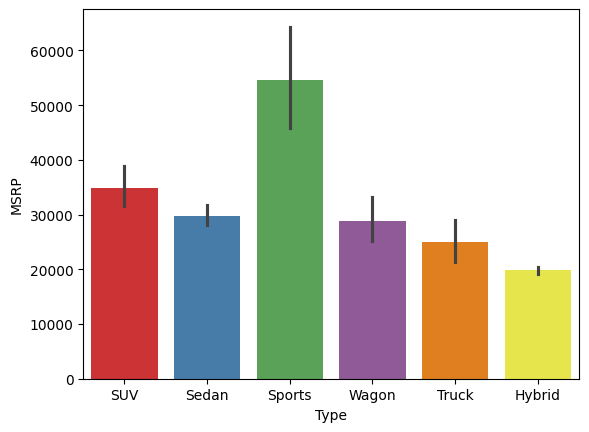

In [34]:
sns.barplot(y='MSRP', x='Type', data=df, palette='Set1', hue='Type')

Contohnya :
- Tinggi bar SUV = rata-rata harga SUV (misalnya sekitar 35.000).
- Garis hitam naik-turun di atas bar = CI, misalnya dari 32.000 – 38.000.<br>
Artinya : 
- Rata-rata tetap 35.000, bukan di antara 30.000–40.000.
- Tapi seaborn bilang: “Kalau kita ambil data SUV lain berkali-kali, rata-rata yang terhitung kemungkinan besar jatuh di rentang 32.000–38.000 ini.”

<Axes: xlabel='MSRP', ylabel='Type'>

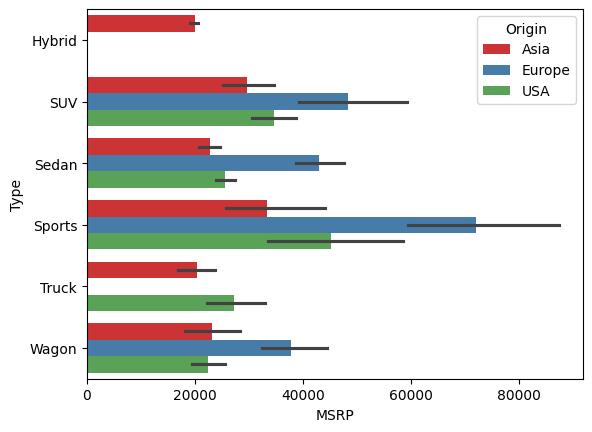

In [ ]:
sns.barplot(x='MSRP', y='Type', data=df, palette='Set1', hue='Origin')

In [31]:
x = df['Type'].sort_values().unique()
x

array(['Hybrid', 'SUV', 'Sedan', 'Sports', 'Truck', 'Wagon'], dtype=object)

Sekarang anda bisa mencoba menambahkan parameter pada plot bar diatas menggunakan `order=` lalu nilainya menggunakan data pada variabel `x` diatas

## 3. Box Plot

1. Box plot adalah plot yang menunjukkan informasi statistik deskriptif dari suatu data, seperti Minimal, Quartil 1, Quartil 2 (Median), Quartil 3, Maksimal, Mean, dan Outliers.<br>
2. Box plot juga berguna untuk menunjukkan data yang memiliki outliers yang diberi tanda bulatan-bulatan kecil.<br>
3. Outliers (nilai ekstrem) adalah nilai yang melenceng atau nilai yang berbeda jauh dari rata-rata, hal ini akan mempengaruhi saat memproses data.  

`seaborn.boxplot(*, x=None, y=None, hue=None, data=None,
order=None, hue order=None, orient=None, color=None,
palette=None, saturation-0.75, width=0.8, dodge=True,
fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)`

In [35]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,"$33,337",3.5,6,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,"$21,761",2.0,4,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,"$24,647",2.4,4,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195,"$30,299",3.2,6,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,"$39,014",3.5,6,225.0,18.0,24.0,3880.0,115.0,197.0


# Style

## Color

`Palette=''`
1. Built in Color Palettes
- Sequential: 'Blues', 'Reds', 'Greens'
- Diverging: 'RdBu', 'coolwarm', 'BrBG'
- Qualitative: 'Set1', 'Set2', 'Paired'
2. Format Strings
- 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind'
3. Color Maps dengan Suffix
- Menambahkan _r untuk membalik urutan warna
- Contoh: 'Blues_r', 'Reds_r'
4. Custom Color List
- Gunakan sns.color_palette() untuk melihat preview palette
- Gunakan sns.palplot() untuk menampilkan palette